<IPython.core.display.Javascript object>


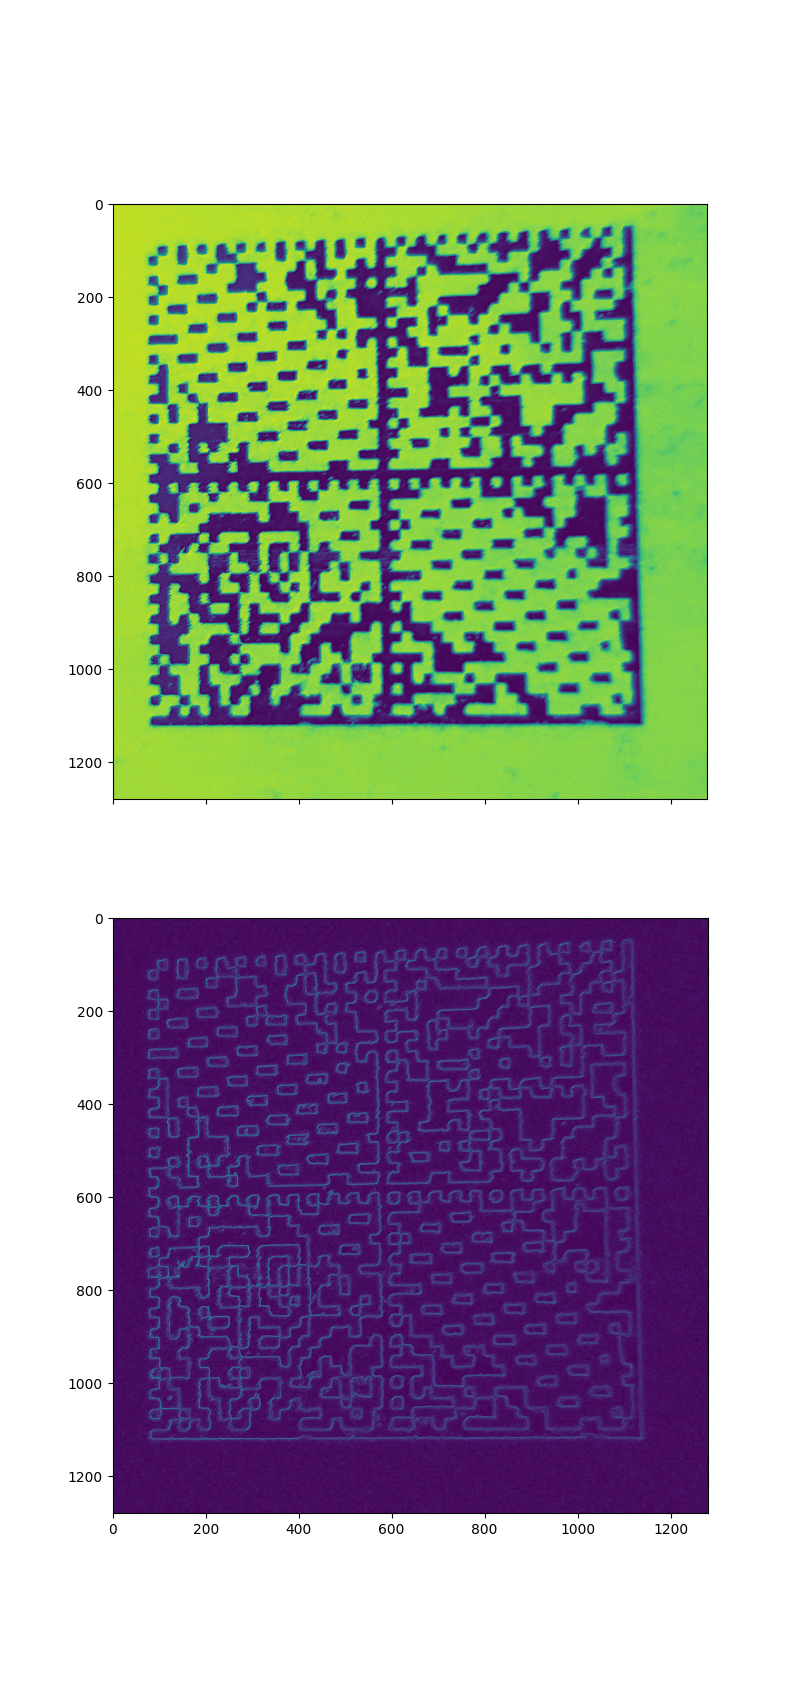

<IPython.core.display.Javascript object>


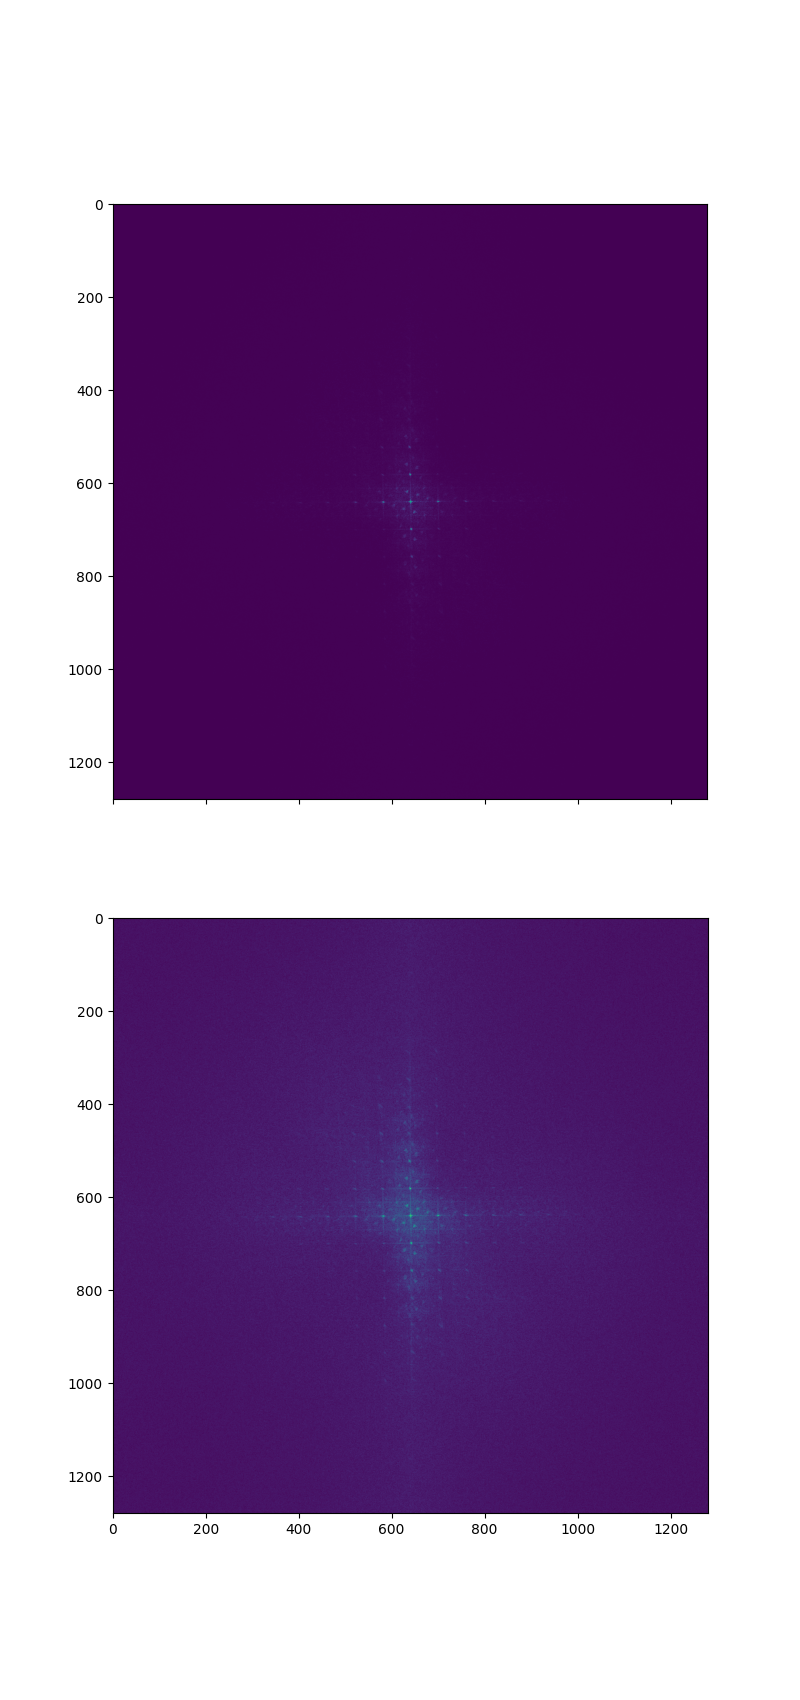

    1    58  0.742 2.4366026038937525
    1    59  0.738 2.4922266397027504
  -58     1  0.658 1.0209385687743273
  -59     1  0.632 1.1894121463102936
    2    59  0.619 1.0352108339808226
   59     0  0.529 1.4662645994560368
  -59     0  0.529 1.522893478719815
    0    -4  0.453 1.515107413187816
    0     4  0.453 1.5291756523916333
   60     0  0.449 0.8359420592186892
  -60     0  0.449 1.1902519071761346
  -60     1  0.442 1.1557900080181769
    0    58  0.442 1.0561016956543756
    0   -58  0.442 0.7518977291775617
    4     0  0.397 0.6647999942080237
   -4     0  0.397 0.77329168212005
    2    58  0.394 0.9099970007239772
    2    60  0.387 0.7830846911433444
    0    59  0.382 0.6357470037121737
    0   -59  0.382 0.5472433015976804
    7    23  0.355 0.5449935117316084
    8    22  0.352 0.7609530633094161
    7    22  0.334 0.5808678640847473
  -57     1  0.316 0.7410485243374947
    8     0  0.300 1.253151201494462
   -8     0  0.300 1.2789106348966786
    6    24  0.28

In [1]:
%matplotlib notebook
from edge_frequency_analysis import EdgeFrequencyAnalysis

im1 = EdgeFrequencyAnalysis("20200522_213922.jpg")
im1.crop(1500, 800, 1280, 1280)
im1.analyze()
im1.list_maximums(80)

<IPython.core.display.Javascript object>


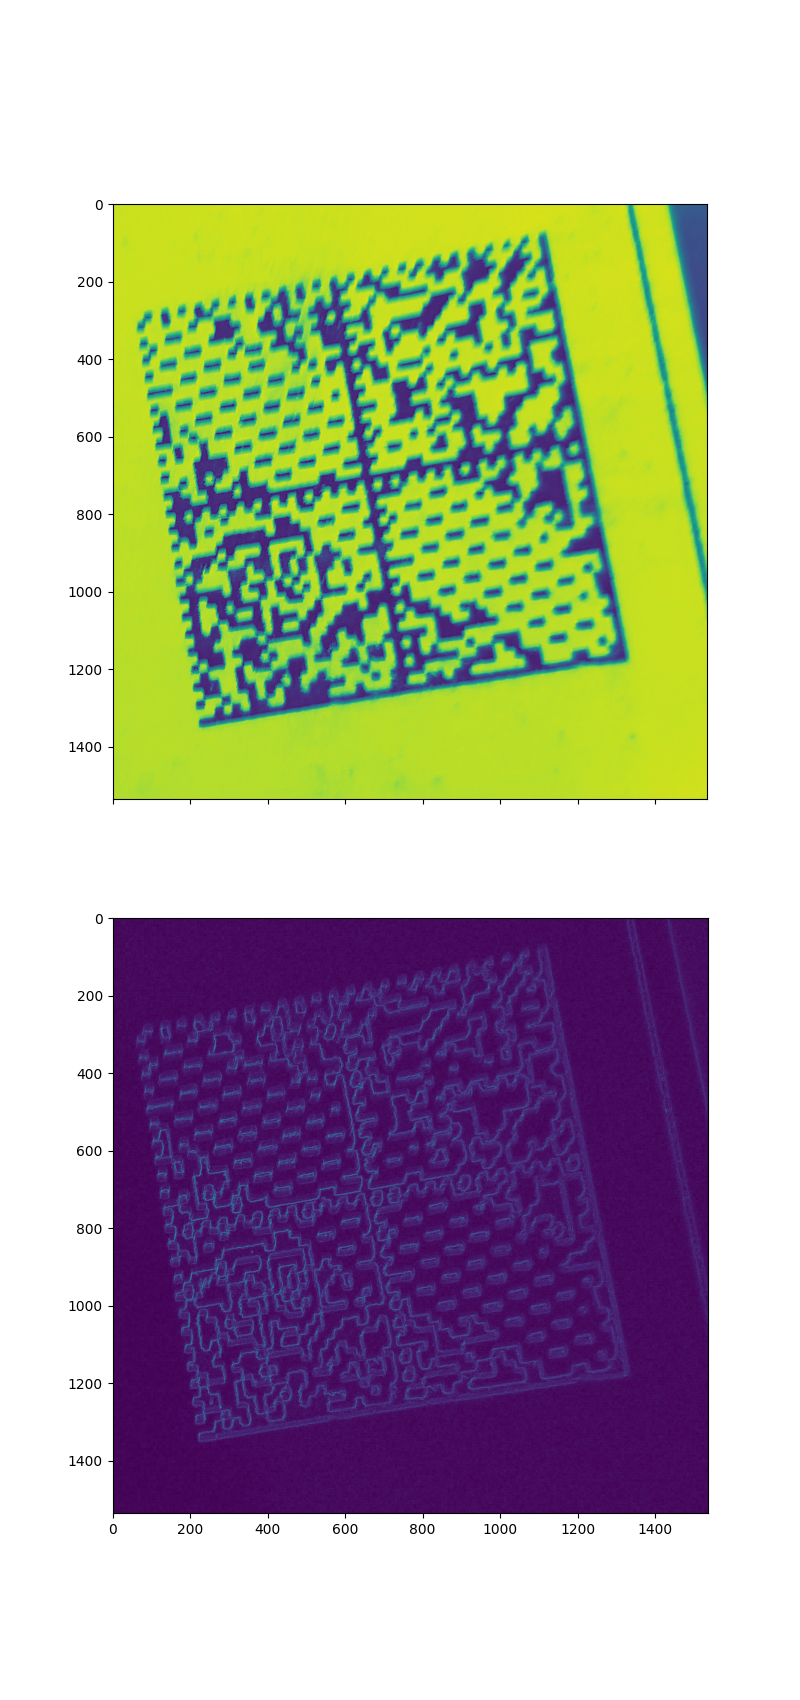

<IPython.core.display.Javascript object>


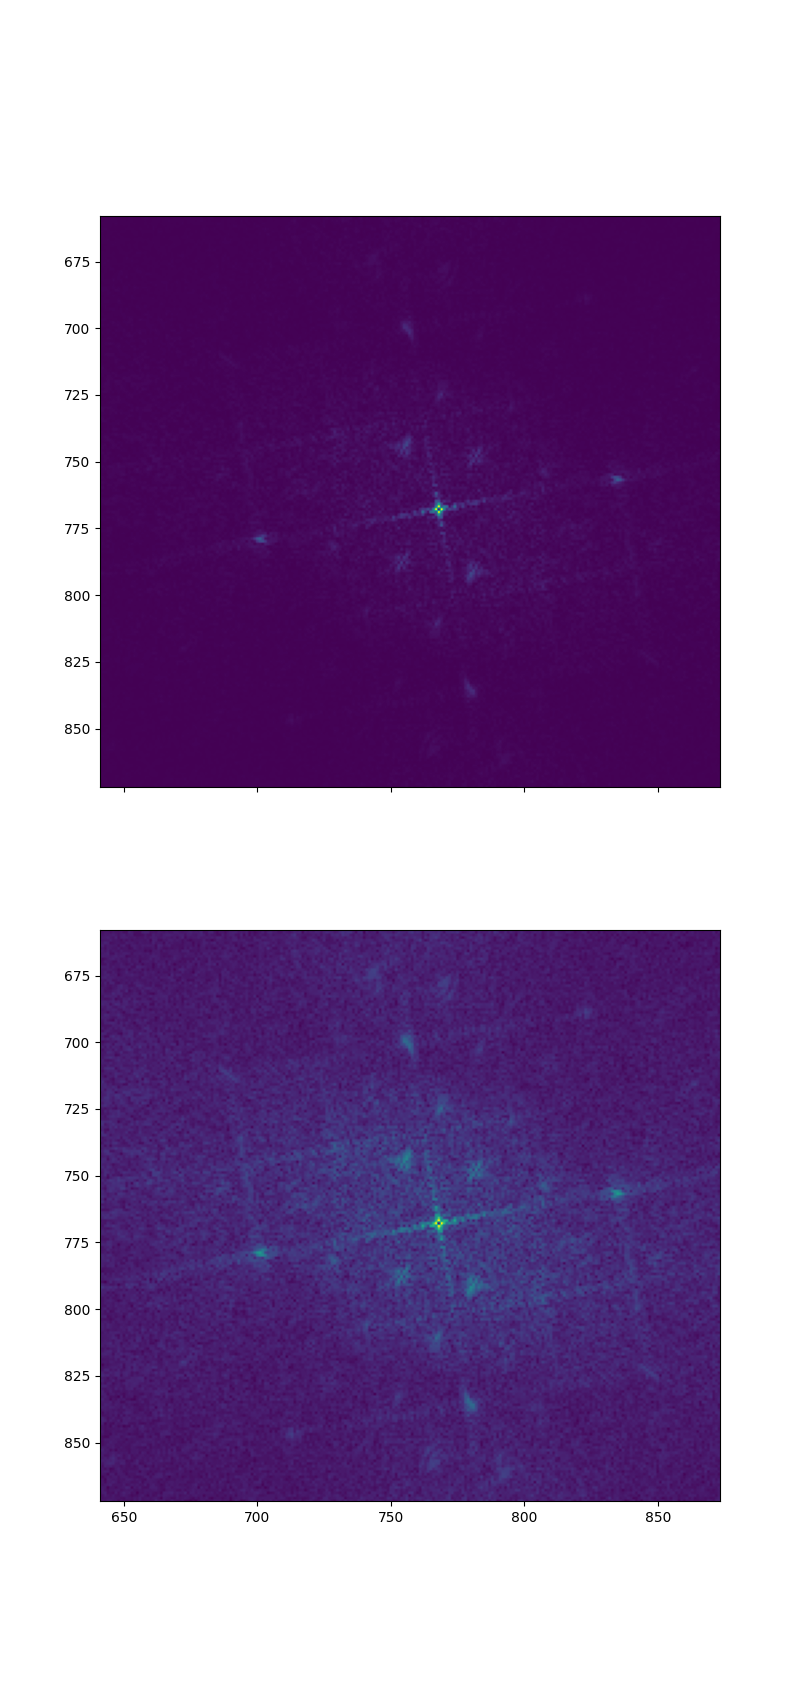

   -6     1  0.484 1.8051345337407623
  -67    11  0.414 0.9714250553918438
Sorted by metric
  -67    11  0.414 0.9714250553918438
   -6     1  0.484 1.8051345337407623


In [21]:
%matplotlib notebook
from edge_frequency_analysis import EdgeFrequencyAnalysis

im2 = EdgeFrequencyAnalysis("20200523_142954.jpg")
im2.crop(1600, 800, 1536, 1536)
im2.analyze()
im2.list_maximums(20)

In [7]:
found_dict = {}

for (x,y),_ in zip(im2.iter_maximums(), range(200)):
    if abs(x)<4 and abs(y)<4:
        continue
    for (x_,y_),list_ in found_dict.items():
        if (x-x_)**2 + (y-y_)**2 <= 9:
            list_.append((x,y))
            break
    else:
        found_dict[x,y]=[(x,y)]
        
for (x,y), list_ in found_dict.items():
    print(x,y,list_)

-6 1 [(-6, 1), (-4, 0), (-6, 2), (-9, 1), (-6, 0), (-5, 1), (-5, 0), (-8, 2), (-7, 0), (-7, 1), (-4, 3), (-7, 2)]
-67 11 [(-67, 11), (-68, 11), (-66, 12), (-67, 12), (-66, 11), (-66, 10), (-65, 12), (-69, 11), (-68, 12), (-65, 10), (-67, 10), (-68, 10), (-65, 13), (-70, 11)]
1 6 [(1, 6), (1, 5), (1, 9), (0, 4), (0, 6), (2, 5), (0, 5), (2, 6)]
4 0 [(4, 0), (6, 0), (5, 0), (7, 0)]
12 24 [(12, 24), (12, 25), (13, 23), (13, 24), (11, 26), (12, 21), (14, 22), (11, 25), (12, 22), (15, 24), (12, 26), (13, 25), (11, 22), (13, 26), (12, 27), (11, 23), (13, 22), (11, 24), (14, 24), (10, 25), (12, 23), (14, 23)]
-17 3 [(-17, 3), (-14, 3), (-17, 4), (-15, 3), (-15, 2), (-18, 4), (-16, 3)]
14 -20 [(14, -20), (15, -22), (13, -18), (15, -18), (15, -21), (12, -20), (13, -22), (12, -18), (13, -19), (14, -21), (15, -19), (16, -20), (16, -18), (11, -20), (13, -21), (16, -22), (14, -17), (14, -19)]
-14 2 [(-14, 2), (-13, 2), (-12, 2), (-13, 3), (-11, 2)]
2 9 [(2, 9), (2, 12), (2, 11), (2, 10)]
-9 2 [(-9, 

<IPython.core.display.Javascript object>


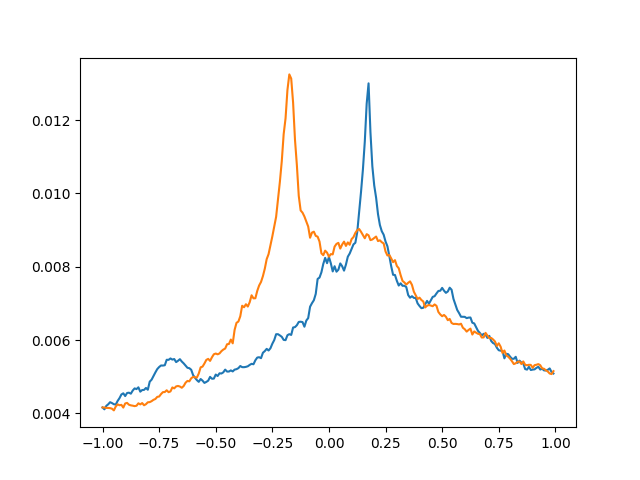

<IPython.core.display.Javascript object>


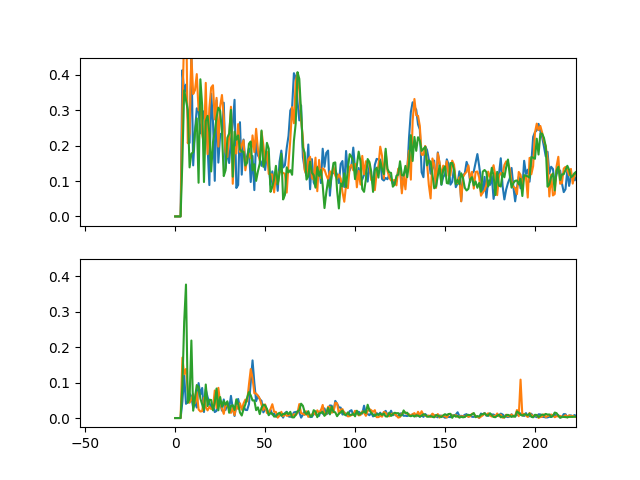

In [74]:
# Making the assumption this is square, if not...

x_size, y_size = im2.edges_f.shape
abs_edges_f = abs(im2.edges_f) / x_size / y_size
abs_edges_f[0:4,0:4] *= 0
abs_edges_f[-3:,0:4] *= 0
abs_edges_f[0:4,-3:] *= 0
abs_edges_f[-3:,-3:] *= 0

if False:
    # 8 pixel problems, assuming wavelets from JPEG
    for i in range(0):
        abs_edges_f[0, i*y_size//8] = 0
        abs_edges_f[i*x_size//8, 0] = 0

resolution = 120
slopes = [_/resolution for _ in range(-resolution,resolution)]
y_results = [] # y = slope * x
x_results = [] # x = slope * y
result_45 = 0

# 45 special case
for i in range(x_size):
    for j in range(-1,2):
        result_45 += abs_edges_f[(i+j)%x_size,i]

for slope in slopes:
    y_result = 0
    x_result = 0
    weight = 0
    for i in range(x_size//2):
        for j in range(-1, 2):
            a, b = i, (round(slope*i)+j)%x_size
            if a > x_size // 2:
                a -= x_size
            if b > x_size // 2:
                b -= x_size
            weight_factor = (a**2 + b**2)**0
            y_result += abs_edges_f[a, b] * weight_factor
            x_result += abs_edges_f[b, a] * weight_factor
            weight += weight_factor
    x_result /= weight
    y_result /= weight
    y_results.append(y_result)
    x_results.append(x_result)

if False:
    for slope, y_result in zip(slopes, y_results):
        print(f"{slope:5.3f} {y_result}")
    print(result_45/x_size)
    for slope, x_result in zip(slopes, x_results):
        print(f"{slope:5.3f} {x_result}")

import matplotlib
figure, axeses = matplotlib.pyplot.subplots(1,1)
axeses.plot(slopes, y_results)
axeses.plot(slopes, x_results)
figure.show()

slope = 0.176
y_result = [[], [], []]
weight = 0
for i in range(x_size//2):
    for j in range(-1, 2):
        a, b = i, (round(slope*i)+j)%x_size
        if a > x_size // 2:
            a -= x_size
        if b > x_size // 2:
            b -= x_size
        weight_factor = (a**2 + b**2)**0
        y_result[j+1].append(abs_edges_f[a, b]**0.5 * weight_factor)

figure, axeses = matplotlib.pyplot.subplots(2,1, sharex=True, sharey=True)
for i in range(3):
    axeses[0].plot(range(x_size//2), y_result[i])
axeses[1].plot(range(x_size), abs_edges_f[:, -1])
axeses[1].plot(range(x_size), abs_edges_f[:, 0])
axeses[1].plot(range(x_size), abs_edges_f[:, 1])
figure.show()


<IPython.core.display.Javascript object>


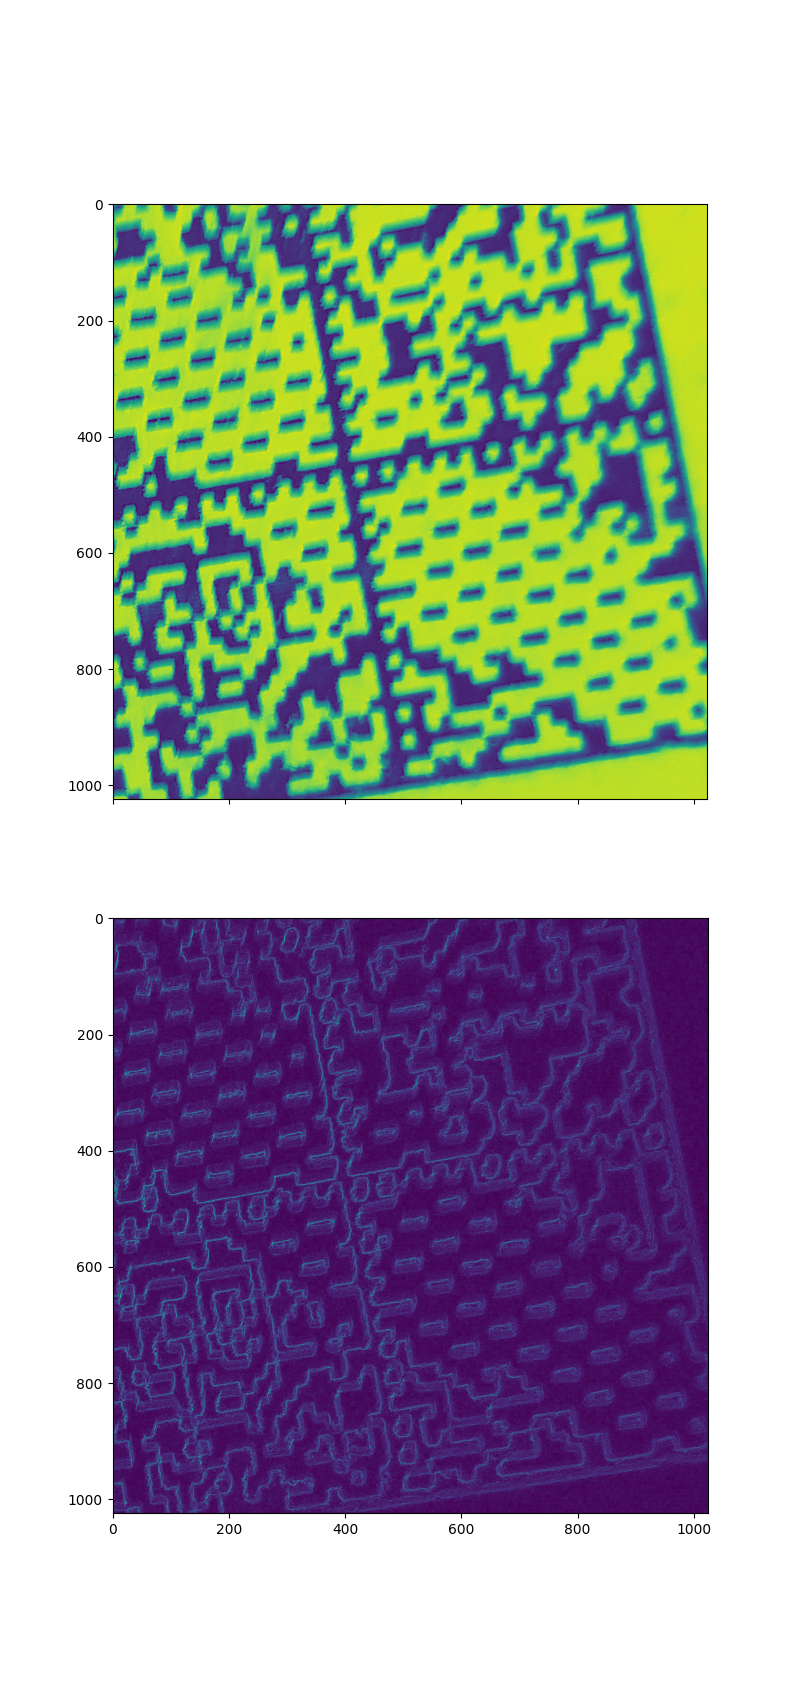

<IPython.core.display.Javascript object>


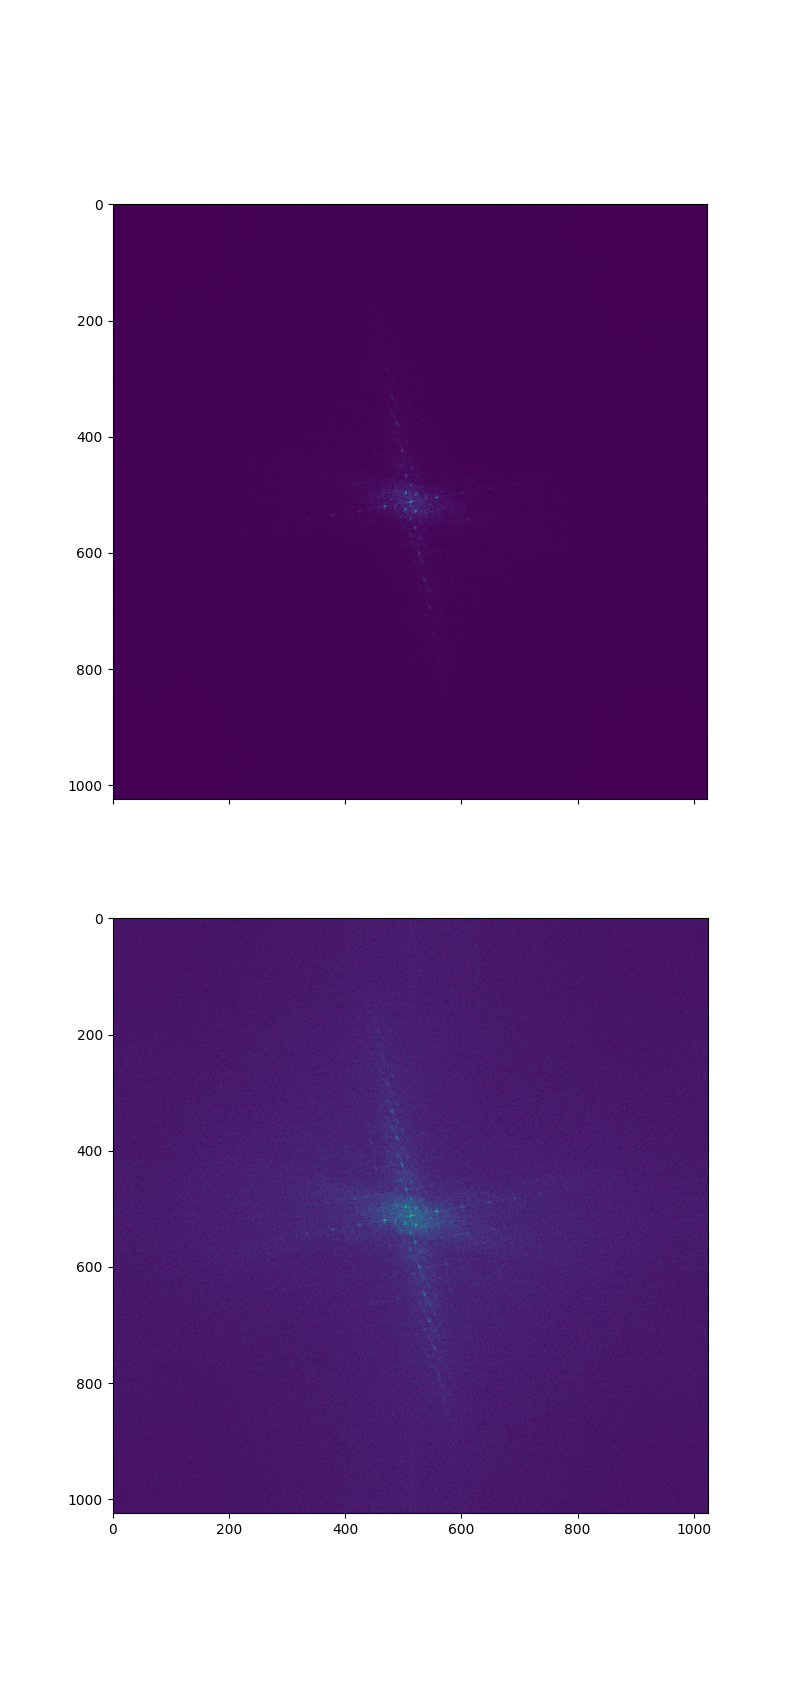

  -44     8  0.691 1.29996647436564
    8    16  0.654 0.8261698843497324
  -45     8  0.547 1.7874607178416637
    8    14  0.511 0.8897952489706613
    7    17  0.400 0.6962919880019989
   10   -12  0.396 0.6603977410221686
  -45     7  0.395 1.1303642306061144
Sorted by metric
   10   -12  0.396 0.6603977410221686
    7    17  0.400 0.6962919880019989
    8    16  0.654 0.8261698843497324
    8    14  0.511 0.8897952489706613
  -45     7  0.395 1.1303642306061144
  -44     8  0.691 1.29996647436564
  -45     8  0.547 1.7874607178416637


In [75]:
%matplotlib notebook
from edge_frequency_analysis import EdgeFrequencyAnalysis

im3 = EdgeFrequencyAnalysis("20200523_142954.jpg")
im3.crop(1600+256, 800+256, 1024, 1024)
im3.analyze()
im3.list_maximums(20)

<IPython.core.display.Javascript object>


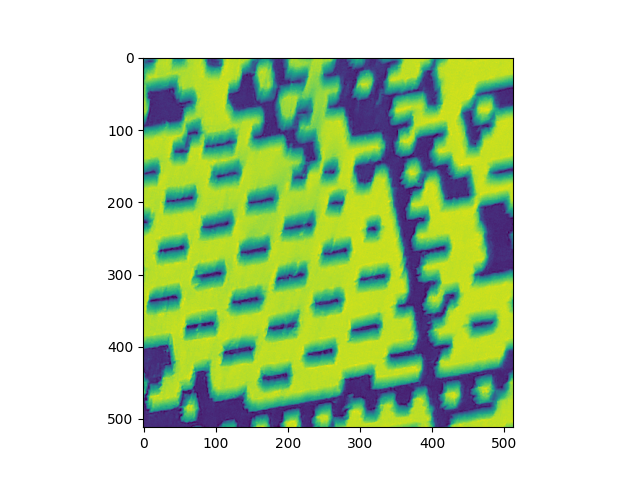

<IPython.core.display.Javascript object>


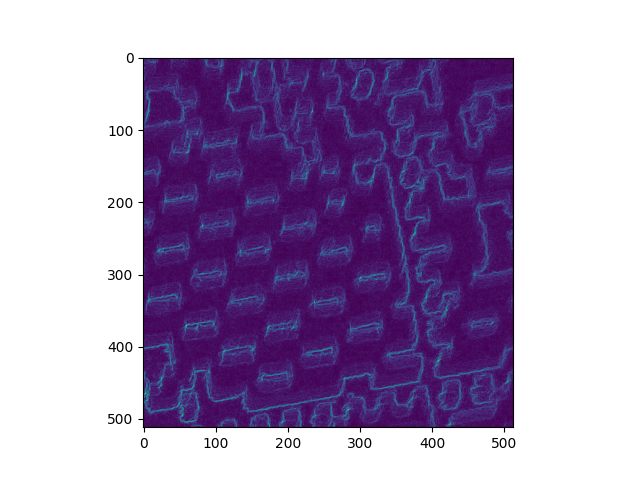

<IPython.core.display.Javascript object>


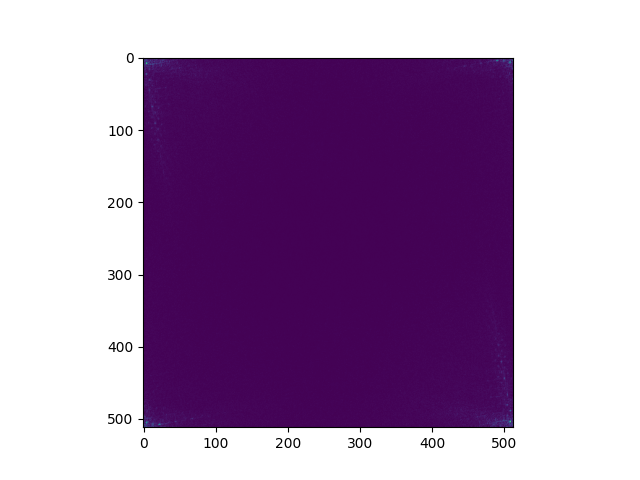

<IPython.core.display.Javascript object>


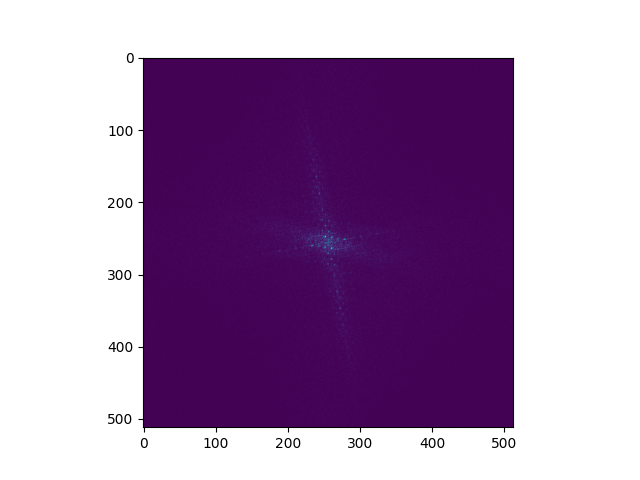

<IPython.core.display.Javascript object>


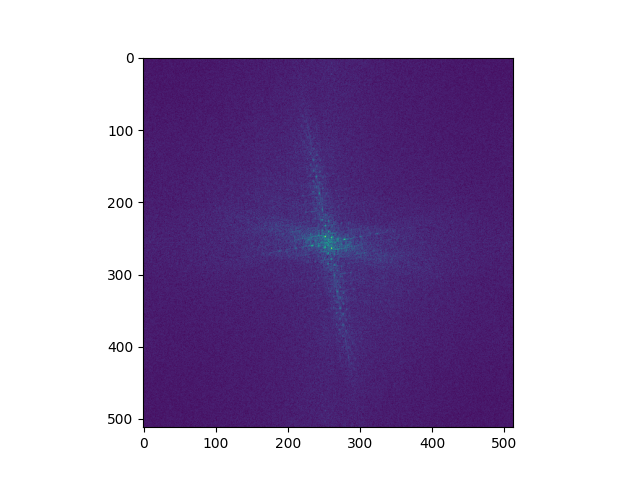

<IPython.core.display.Javascript object>


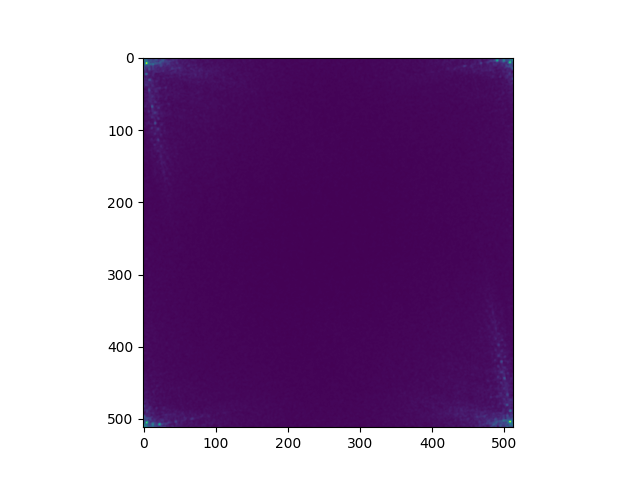

    5     8  5.120 10.653942519864419
    4     8  4.842 11.746590654839899
    5     9  4.306 8.712609504667867
    5     7  4.242 9.353156806689473
    4     7  4.112 10.757001123399018
    0    -1  4.059 20.959084892627292
    4     9  3.998 8.957454235319608
    5    -7  3.964 10.916302729994612
    4    -7  3.759 12.318316135809315
    3     8  3.715 11.49344794595892
    4    -6  3.549 14.432142630018221
   -2     0  3.499 22.585544669642314
    5    -6  3.492 12.809989505815556
    0    -2  3.420 19.168388742003586
   -1     0  3.406 18.18513137585427
    3     9  3.377 8.820544224415826
    0   -15  3.308 10.33538170355659
    0    -4  3.166 16.191378597857263
    0     2  3.166 15.028745965482898
   -3     0  3.162 19.403597439775353
  -22     5  3.159 9.219405053605794
  -22     4  3.126 9.633953290034398
    2     0  3.087 12.630780759275368
    6     8  3.043 7.915741853746255
    6    -7  3.009 9.291091530743191
  -23     5  2.994 10.755384954492882
    1    -1  2.994 17.4

In [13]:
%matplotlib notebook
from edge_frequency_analysis import EdgeFrequencyAnalysis

im4 = EdgeFrequencyAnalysis("20200523_142954.jpg")
im4.crop(1600+256, 800+256, 512, 512)
im4.analyze()
im4.list_maximums(100)